In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from scipy.optimize import curve_fit

from utils.model import hill_activation, hill_activation_single, hill_activation_and, random_search
from utils.helper import generate_data_at_t, \
                       get_blank_corrected, get_neg_ctrl_corrected, get_pos_ctrl_corrected
from utils.plotter import plot_heatmap

In [1]:
def plot_multiple_responses(data, promoters, inducers, row=2, col=2, xlabel='RPU', ylabel='RPU'):
    
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            ys = []
            for j in range(1, 3):
                label = '{}.{}'.format(promoters[i], j)
                y = data[filter(lambda x: x.startswith(label), samples_t.index)]
                if len(y)>0:
                    ys.append(y)
            ax.errorbar(inducers[i], np.mean(ys, axis=0), np.std(ys, axis=0), marker='o', linestyle='')
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.loglog()
            ax.set_title(promoters[i])
        else:
            ax.set_visible(False)
    plt.tight_layout()
    sns.despine()

In [2]:
def plot_single_response(data, promoters, inducers, row=2, col=3, xlabel='RPU', ylabel='RPU'):
    
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            y = data[filter(lambda x: x.startswith(promoters[i]), samples_t.index)]
            ax.scatter(inducers[i], y)
            #print(np.mean(ys, axis=0), np.std(ys, axis=0))
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.loglog()
            ax.set_title(promoters[i])
        else:
            ax.set_visible(False)
    plt.tight_layout()
    sns.despine()

In [3]:
folder = '044-promoters-characterization-jump'
aras = [3.09944E-06, 1.23978E-05, 4.95911E-05, 0.000198364, 0.000793457, 0.003173828, 0.012695313, 0.05078125, 0.203125, 0.8125, 3.25, 13]
ohc14s = [0.004882813, 0.009765625, 0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10]
sals = [0.048828125, 0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100]
oc6s = [2.38419E-06, 9.53674E-06, 3.8147E-05, 0.000152588, 0.000610352, 0.002441406, 0.009765625, 0.0390625, 0.15625, 0.625, 2.5, 10]
promoters = ['PBAD', 'PCin', 'PSalTTC', 'PLuxB']
inducers = [aras, ohc14s, sals, oc6s]
samples_t = generate_data_at_t(folder, 'raw', 'plate_map')[0]

NameError: name 'generate_data_at_t' is not defined

In [4]:
plot_multiple_responses(samples_t, promoters, inducers)

NameError: name 'samples_t' is not defined

In [6]:
#GFP
folder = '051-promoters-characterization'
aras = [0.006347656, 0.012695313, 0.025390625, 0.05078125, 0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13]
ohc14s = [0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20, 40]
sals = [0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800, 1600]
promoters = ['PBAD-GFP', 'PCin-GFP', 'PSalTTC-GFP']
inducers = [aras, ohc14s, sals]
samples_t = generate_data_at_t(folder, 'raw', 'plate_map_gfp')[0]

[('A', 'sample'), ('A', 'positive')]


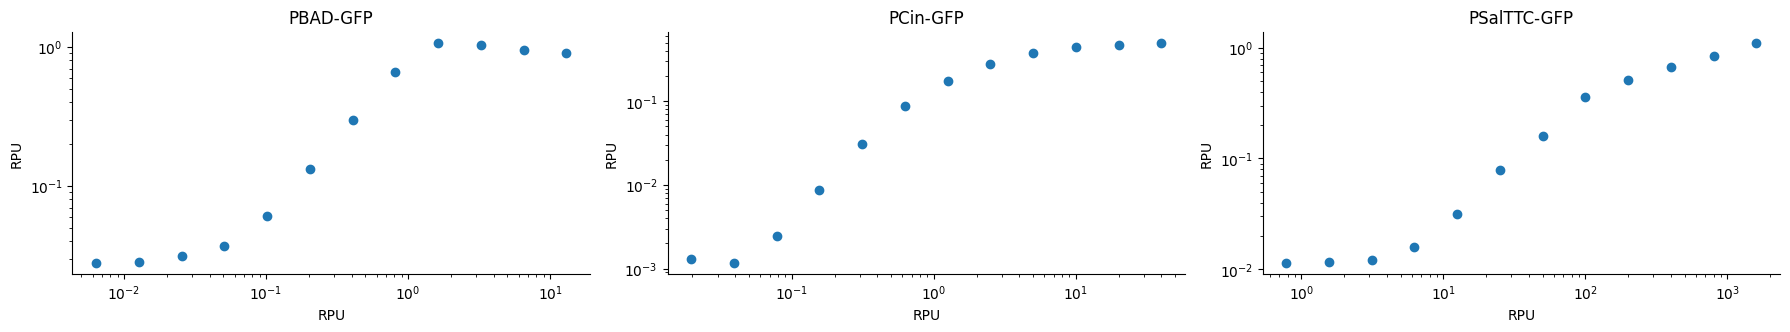

In [7]:
plot_single_response(samples_t, promoters, inducers)

In [8]:
#mCherry
folder = '051-promoters-characterization'
aras = [0.006347656, 0.012695313, 0.025390625, 0.05078125, 0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13]
ohc14s = [0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20, 40]
sals = [0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800, 1600]
promoters = ['PBAD-mC', 'PCin-mC', 'PSalTTC-mC']
inducers = [aras, ohc14s, sals]
samples_t = generate_data_at_t(folder, 'raw', 'plate_map_mc')[0]

[('A', 'sample'), ('A', 'positive')]


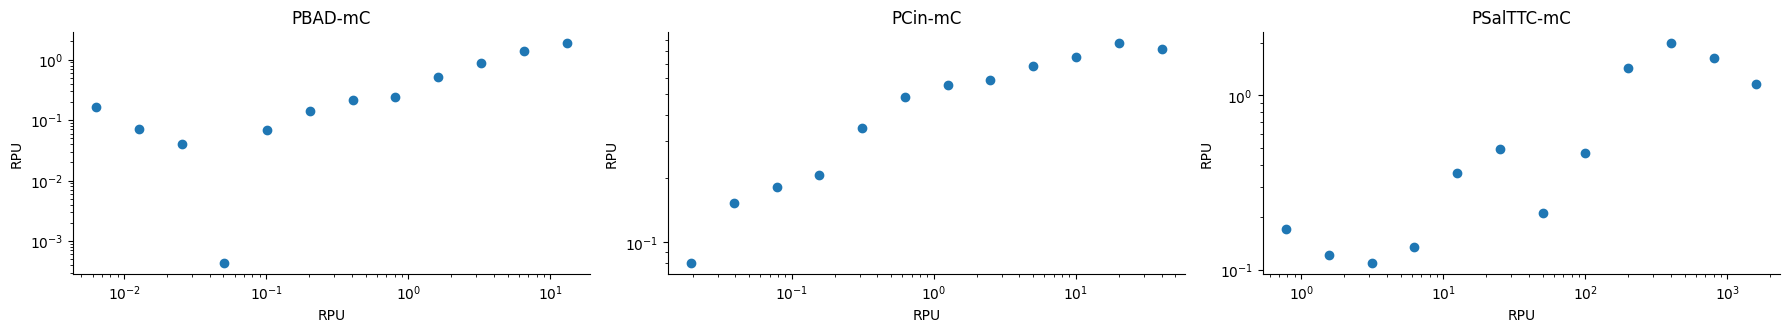

In [9]:
plot_single_response(samples_t, promoters, inducers)

In [10]:
folder = '054-promoters-34-characterization'
aras = [0.006347656, 0.012695313, 0.025390625, 0.05078125, 0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13],
ohc14s = [0.009765625, 0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 0.625, 1.25, 2.5, 5, 10, 20],
sals = [0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800],
iptgs = [0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125, 250, 500, 1000]
promoters = ['PBAD.1', 'PCin.1', 'PSalTTC.1', 'PBAD.34', 'PSalTTC.34', 'PTac.34']
inducers = [aras, ohc14s, sals, aras, sals, iptgs]
samples_t = generate_data_at_t(folder, 'raw', 'plate_map')[0]

[('A', 'sample'), ('A', 'positive')]


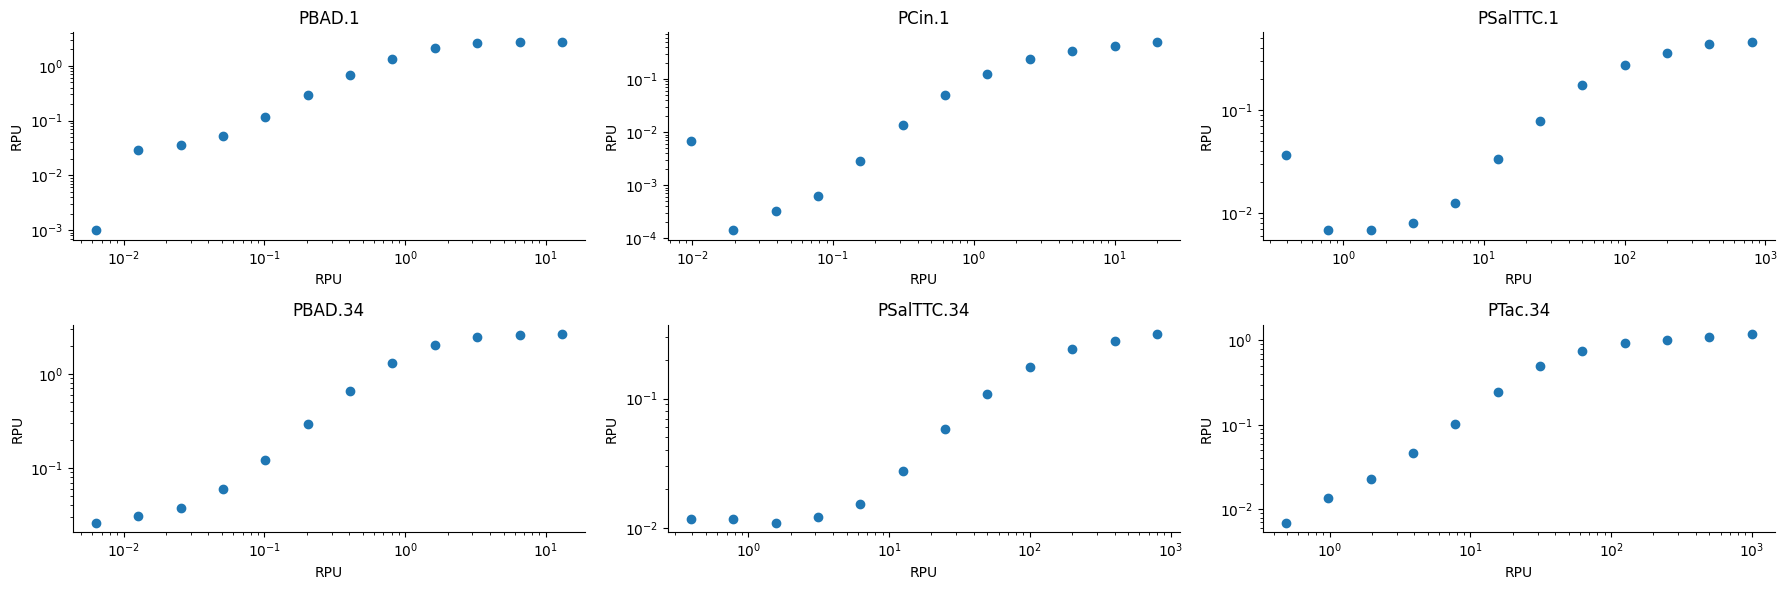

In [11]:
plot_single_response(samples_t, promoters, inducers)

In [12]:
folder = '055-promoters-32-33-characterization'
aras = [0.006347656, 0.012695313, 0.025390625, 0.05078125, 0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13],
sals = [0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25, 50, 100, 200, 400, 800],
iptgs = [0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125, 250, 500, 1000]
promoters = ['PBAD.32', 'PSalTTC.32', 'PTac.32', 'PBAD.33', 'PSalTTC.33', 'PTac.33']
inducers = [aras, sals, iptgs, aras, sals, iptgs]
samples_t = generate_data_at_t(folder, 'raw', 'plate_map')[0]

[('A', 'sample'), ('A', 'positive')]


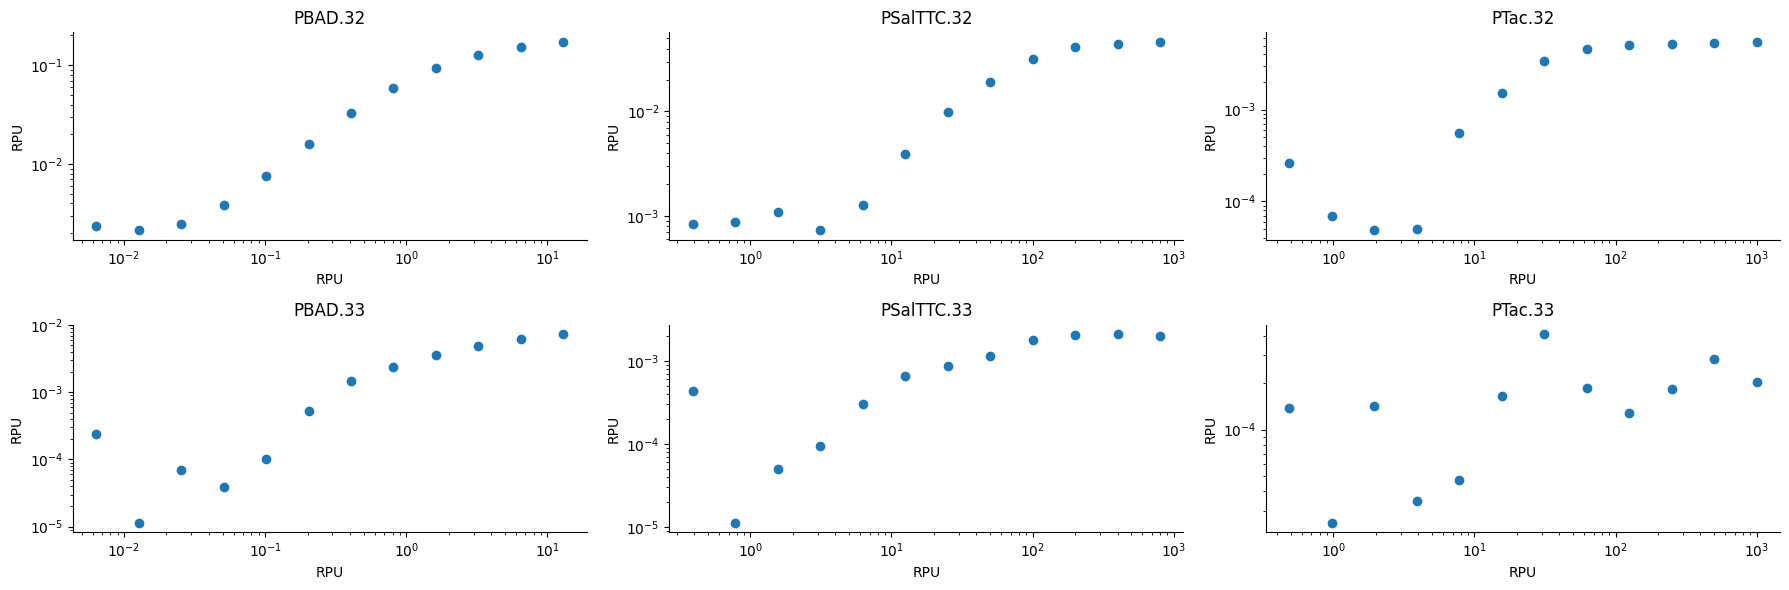

In [13]:
plot_single_response(samples_t, promoters, inducers)

In [14]:
folder = '057-promoters-34-characterization-optimize'
aras = [2.47955E-05, 4.95911E-05, 9.91821E-05, 0.000198364, 0.000396729, 0.000793457, 0.001586914, 0.003173828, 0.006347656, 0.012695313, 0.025390625, 0.05078125,
        0.1015625, 0.203125, 0.40625, 0.8125, 1.625, 3.25, 6.5, 13, 26, 52, 104, 208]
ohc14s = [7.62939E-05, 0.000152588, 0.000305176, 0.000610352, 0.001220703, 0.002441406, 0.004882813, 0.009765625, 0.01953125, 0.0390625, 0.078125, 0.15625,
          0.3125, 0.625, 1.25, 2.5, 5, 10, 20, 40, 80, 160, 320, 640]
#sals = [0.001525879, 0.003051758, 0.006103516, 0.012207031, 0.024414063, 0.048828125, 0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125,
#        6.25, 12.5, 25, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
sals = [0.006103516, 0.012207031, 0.024414063, 0.048828125, 0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125,
        6.25, 12.5, 25, 50, 100, 200, 400, 800]
iptgs = [0.000953674, 0.003814697, 0.015258789, 0.061035156, 0.244140625, 0.9765625, 3.90625, 15.625, 62.5, 250, 1000, 4000]
promoters = ['PBAD.34', 'PCin.34', 'PSalTTC.34', 'PTac.34']
inducers = [aras, ohc14s, sals, iptgs]
samples_t = generate_data_at_t(folder, 'raw', 'plate_map')[0]

[('A', 'sample'), ('A', 'positive')]


In [15]:
ys = [
    pd.concat([samples_t[48:60], samples_t[0:12]]),
    pd.concat([samples_t[60:72], samples_t[12:24]]),
    pd.concat([samples_t[72:84], samples_t[24:36]])[2:-4],
    samples_t[36:48]
]

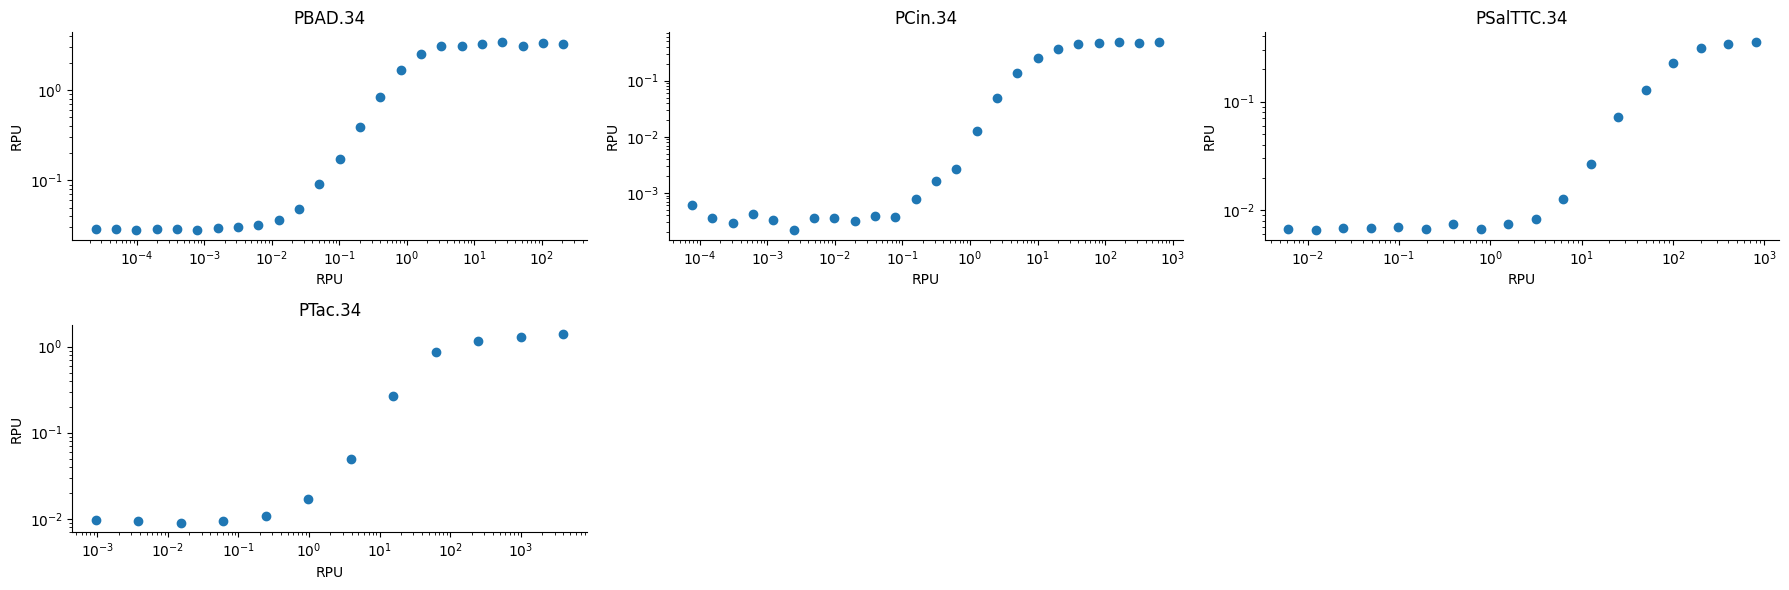

In [16]:
def plot_combined_responses(data, promoters, inducers, row=2, col=3, xlabel='RPU', ylabel='RPU'):
    
    f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(promoters):
            ax.scatter(inducers[i], data[i])
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            ax.loglog()
            ax.set_title(promoters[i])
        else:
            ax.set_visible(False)
    plt.tight_layout()
    sns.despine()

plot_combined_responses(ys, promoters, inducers)

[0.03434328 1.97366398 2.70800009 2.96704089 3.08596527 3.15067035
 3.19002804 3.21590387 3.23391486 3.24700953 3.25686196 3.26448298
 3.27051394 3.27537864 3.27936683 3.28268243 3.28547251 3.2878455
 3.28988283 3.2916467  3.29318534 3.29453661 3.29573063 3.29679161
 3.29773918 3.29858943 3.29935566 3.30004892 3.30067847 3.30125213
 3.30177653 3.30225733 3.30269938 3.30310688 3.30348344 3.30383222
 3.30415598 3.30445713 3.3047378  3.30499986 3.30524497 3.30547462
 3.30569012 3.30589265 3.30608326 3.30626291 3.30643243 3.30659262
 3.30674415 3.30688768 3.30702376 3.30715292 3.30727565 3.30739236
 3.30750348 3.30760935 3.30771031 3.30780668 3.30789874 3.30798675
 3.30807095 3.30815157 3.30822881 3.30830287 3.30837392 3.30844213
 3.30850766 3.30857065 3.30863123 3.30868953 3.30874567 3.30879975
 3.30885188 3.30890216 3.30895067 3.30899749 3.30904272 3.30908642
 3.30912866 3.30916951 3.30920903 3.30924729 3.30928433 3.30932021
 3.30935498 3.30938868 3.30942137 3.30945308 3.30948385 3.30951

[0.00681652 0.00723238 0.00805295 0.00915123 0.0104761  0.01199535
 0.01368537 0.01552744 0.01750595 0.01960745 0.02182007 0.02413318
 0.02653711 0.02902302 0.03158276 0.03420879 0.03689409 0.03963211
 0.04241674 0.04524228 0.04810338 0.05099503 0.05391253 0.05685151
 0.05980784 0.06277768 0.06575743 0.06874373 0.07173344 0.07472362
 0.07771156 0.08069471 0.08367071 0.08663738 0.08959268 0.09253475
 0.09546185 0.09837239 0.1012649  0.10413805 0.10699059 0.10982143
 0.11262952 0.11541397 0.11817392 0.12090865 0.12361749 0.12629984
 0.12895519 0.13158308 0.13418312 0.13675499 0.13929839 0.1418131
 0.14429895 0.14675578 0.14918351 0.15158207 0.15395144 0.15629162
 0.15860267 0.16088464 0.16313762 0.16536173 0.16755711 0.16972392
 0.17186233 0.17397253 0.17605473 0.17810916 0.18013605 0.18213564
 0.18410818 0.18605396 0.18797322 0.18986627 0.19173337 0.19357484
 0.19539095 0.19718201 0.19894833 0.20069021 0.20240796 0.20410189
 0.20577231 0.20741954 0.20904388 0.21064565 0.21222516 0.21378

[0.00575187 0.01554165 0.02969371 ... 1.33694712 1.33694829 1.33694945]


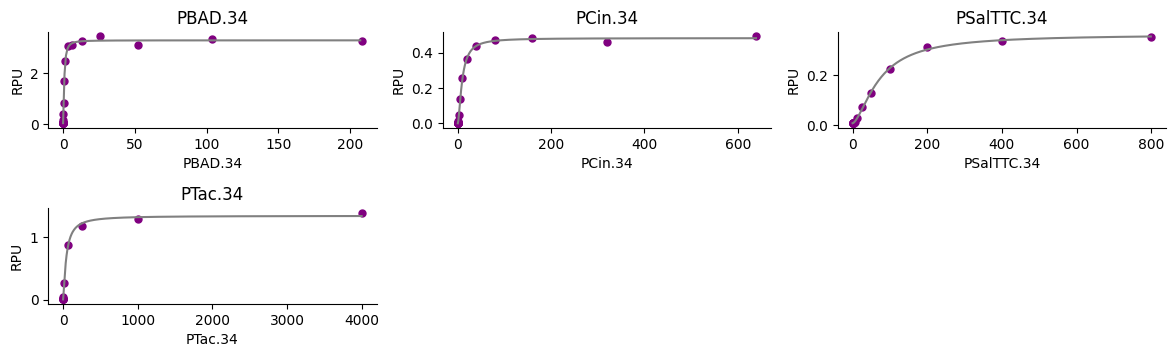

In [21]:
all_params = []
f, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(12, 5))
axr = axs.ravel()

for i, ax in enumerate(axr):
    
    if i < len(promoters):
        
        y = ys[i]
        x = inducers[i]
        #init_guess = [1, 1, 1]
        gate_bounds = [[-10, -10, -10, -10],
                       [2, 2, 1, -1]]
        init_guess = random_search(50, x, y, gate_bounds, hill_activation_single)
        popt, pcov = curve_fit(hill_activation_single, x, y, p0=init_guess, bounds=gate_bounds)
        
        
        ax.scatter(x, y, color='purple', s=25)
        #err = np.round(r2_score(y, hill_activation_single(x, *popt)), 2)
        
        yp = hill_activation_single(np.arange(max(x)), *popt)
        print(yp)
        
        ax.plot(np.arange(max(x)), yp, color='gray')#, label='R2='+str(err))
        
        all_params.append(popt)
        #print(promoters[i], popt, r2_score(y, hill_activation_single(x, *popt)))
        
        #ax.set_xscale('symlog')
        #ax.set_yscale('symlog')
        
        ax.set_title('{}'.format(promoters[i]))
        ax.set_ylabel('RPU')
        ax.set_xlabel('{}'.format(promoters[i]))
        #ax.legend(loc=4)
        
    else:
        ax.set_visible(False)
        
    sns.despine()
plt.tight_layout()

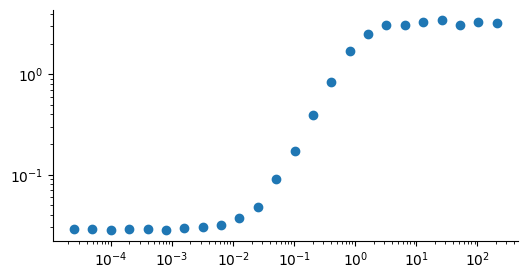

In [26]:
plt.figure(figsize=[6, 3])
y = ys[0]
x = aras
plt.scatter(x, y)
plt.loglog()
sns.despine()

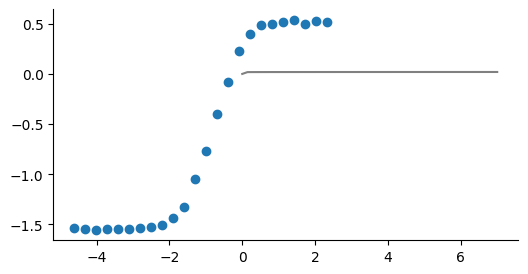

In [27]:
y = np.log10(ys[0])
x = np.log10(aras)
plt.figure(figsize=[6, 3])
plt.scatter(x, y)
plt.plot(np.linspace(0, 7), hill_activation_single(np.linspace(0, 7), *[i+np.min(np.log10(ys[0])) for i in popt]), color='gray')
sns.despine()

In [28]:
y = np.log10(ys[0])
x = np.log10(aras)
gate_bounds = [[-5, -5, -5, -5],
               [5, 5, 5, 7]]
init_guess = random_search(50, x, y, gate_bounds, hill_activation_ymin_ymax)
popt, pcov = curve_fit(hill_activation_single, x, y, p0=init_guess, bounds=gate_bounds)
popt

NameError: name 'hill_activation_ymin_ymax' is not defined

In [30]:
#popt = [0.51998586, -0.1, 0.20741291, -1.98380318]
y = np.array([i-np.min(np.log10(ys[0])) for i in np.log10(ys[0])])
x = np.array([i-np.min(np.log10(aras)) for i in np.log10(aras)])
gate_bounds = [[0, 0, 0, -2],
               [6, 6, 10, -1]]
init_guess = random_search(50, x, y, gate_bounds, hill_activation_single)
popt, pcov = curve_fit(hill_activation_single, x, y, p0=init_guess, bounds=gate_bounds)
popt

ValueError: Residuals are not finite in the initial point.

In [ ]:
popt2 = [i+np.min(np.log10(ys[0])) for i in popt]

In [ ]:
y_ = np.log10(ys[0])
x_ = np.log10(aras)

In [ ]:
plt.figure(figsize=[6, 3])
plt.scatter(x, y)
plt.scatter(x_, y_, color='red')
plt.plot(np.linspace(0, 7), hill_activation_single(np.linspace(0, 7), *popt2), color='gray')
sns.despine()

In [ ]:
def hill_activation_single(x, ag, K, n, eps):

    ag_, K_, n_, eps_ = 10**ag, 10**K, 10**n, 10**eps
    return ag_ * hill_activation(x, K_, n_, eps_)

In [31]:
#PBAD
y = ys[0]
x = aras
gate_bounds = [[-10, -10, -10, -10],
               [4, 4, 2, -1]]
init_guess = random_search(50, x, y, gate_bounds, hill_activation_single)
popt, pcov = curve_fit(hill_activation_single, x, y, p0=init_guess, bounds=gate_bounds)
#print(r2_score(y, hill_activation_single(x, *popt)))
popt

array([ 0.51997747, -0.10008846,  0.20742217, -1.98413572])

In [ ]:
plt.figure(figsize=[5, 3])
plt.scatter(x, y)
plt.plot(np.logspace(-5, 3), hill_activation_single(np.logspace(-5, 3), *popt), color='gray')
plt.loglog()
plt.xlabel('Ara [RPU]')
plt.ylabel('GFP [RPU]')
sns.despine()

In [ ]:
x

In [ ]:
popt

In [ ]:
hill_activation_single(-9.91169918, *popt)

In [ ]:
0.51998586 * ((-10.60484837**0.20741291 + (-3*(-0.1**0.20741291))) / (-0.1**0.20741291 + -10.60484837**0.20741291))

In [ ]:
#PBAD


In [ ]:
plt.figure(figsize=[6, 3])
y = np.log10(ys[0])
x = np.log10(aras)
plt.plot(x, hill_activation_single(x, 0.4, 3, -6, 1.5),color='gray')
plt.scatter(x, y)

In [ ]:
hill_activation_single(x, 1, -2, -5, -1.6)

In [ ]:
aras_rpu = [hill_activation_single(i, *all_params[0]) for i in inducers[0]]
ohc14s_rpu = [hill_activation_single(i, *all_params[1]) for i in inducers[1]]
sals_rpu = [hill_activation_single(i, *all_params[2]) for i in inducers[2]]
iptgs_rpu = [hill_activation_single(i, *all_params[3]) for i in inducers[3]]

print(aras_rpu)
print(ohc14s_rpu)
print(sals_rpu)
print(iptgs_rpu)